# 1 Regularized Linear Regression

# 1.1 Visualizing the data

In [234]:
import numpy as np
import scipy.optimize as optimize
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
mat = sio.loadmat('ex5data1.mat')

In [236]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [237]:
x = mat['X']
y = mat['y']
x_test = mat['Xtest']
y_test = mat['ytest']
x_val = mat['Xval']
y_val = mat['yval']

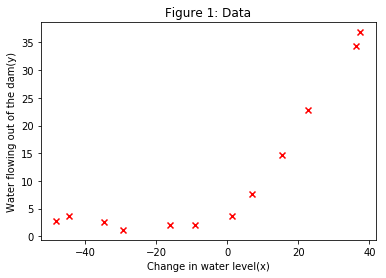

In [238]:
plt.scatter(X, y, marker='x', c='red')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.title('Figure 1: Data')
plt.show()

# 1.2 Regularized linear regression cost function

In [239]:
def linearRegCostFunction(theta, x, y,l):
    m = len(y)
    h = x @ theta
    err = h - y
    J = 0.5 / m * err.T @ err + l * 0.5 / m * theta[1:].T @ theta[1:]
    
    return J[0, 0]

In [240]:
theta = np.ones((2, 1))
x = np.append(np.ones((x.shape[0], 1)), x, axis=1)
linearRegCostFunction(theta, x, y, 1)
## expected value 303.993

303.9931922202643

# 1.3 Regularized linear regression gradient

In [241]:
def linearRegGradFunction(theta, x, y, l):
    m = len(y)
    grad = 1 / m * x.T @ (x @ theta - y)
   
    grad[1:] = grad[1:] + l / m * theta[1:]
    
    return grad[:, 0]

In [242]:
linearRegGradFunction(theta, x, y, 1)
## expected value [-15.303016; 598.250744]

array([-15.30301567, 598.25074417])

In [253]:
def trainLinearReg(x, y, l):
    initial_theta = np.zeros((x.shape[1], 1))
    theta = optimize.fmin_cg(linearRegCostFunction, x0=initial_theta, fprime=linearRegGradFunction, maxiter=200, args=(x, y, l))
    return theta

In [254]:
def featureNormalize(x):
    x_norm = x
    num_feat = x.shape[1]
    mu = np.zeros([1, num_feat])
    sigma = np.zeros([1, num_feat])
    
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    
    x_norm = (x - mu) / sigma
    
    return x_norm

In [255]:
x_norm = featureNormalize(X)
x_norm = np.append(np.ones((x_norm.shape[0], 1)), x_norm, axis=1)

In [256]:
theta = trainLinearReg(x_norm, y, 0)
theta

         Current function value: 90.630748
         Iterations: 1
         Function evaluations: 49
         Gradient evaluations: 37


array([25.20270592, 23.70533892])

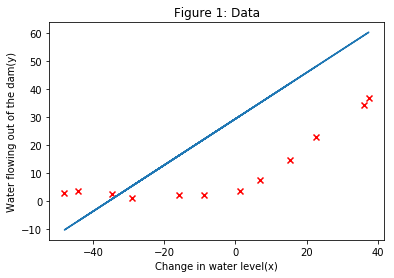

In [257]:
plt.scatter(X, y, marker='x', c='red')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.title('Figure 1: Data')
plt.plot(X, x_norm @ theta)
plt.show()